In [1]:
%load_ext autoreload
%autoreload 2
import diffusers
from diffusers import StableDiffusionPipeline
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [8]:
pipeline = StableDiffusionPipeline.from_pretrained("models/t2i/").to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [4]:
choices = {"ar", "as", "pr", "ps", "gs", "gr"}
random_choices = [" ".join(choice) for choice in np.random.choice(list(choices), (16, 3), replace=True)]
random_choices

['gr as ps',
 'ps pr ps',
 'as ps ps',
 'gs as as',
 'ps gs ar',
 'gs ar gr',
 'ps gs gs',
 'as pr gr',
 'gs ps gs',
 'ps gs as',
 'gs ps ar',
 'gs gs pr',
 'as ps gs',
 'ps ps gs',
 'ps gr gr',
 'gr as ar']

In [9]:
images = pipeline(random_choices, height=256, width=256, num_inference_steps=100)[0]
images = [image.convert("L") for image in images]

  0%|          | 0/100 [00:00<?, ?it/s]

In [10]:
def plot_images(images, title=None):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))

    # Plot each image in the grid
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i], cmap='gray')
        ax.set_title(title[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

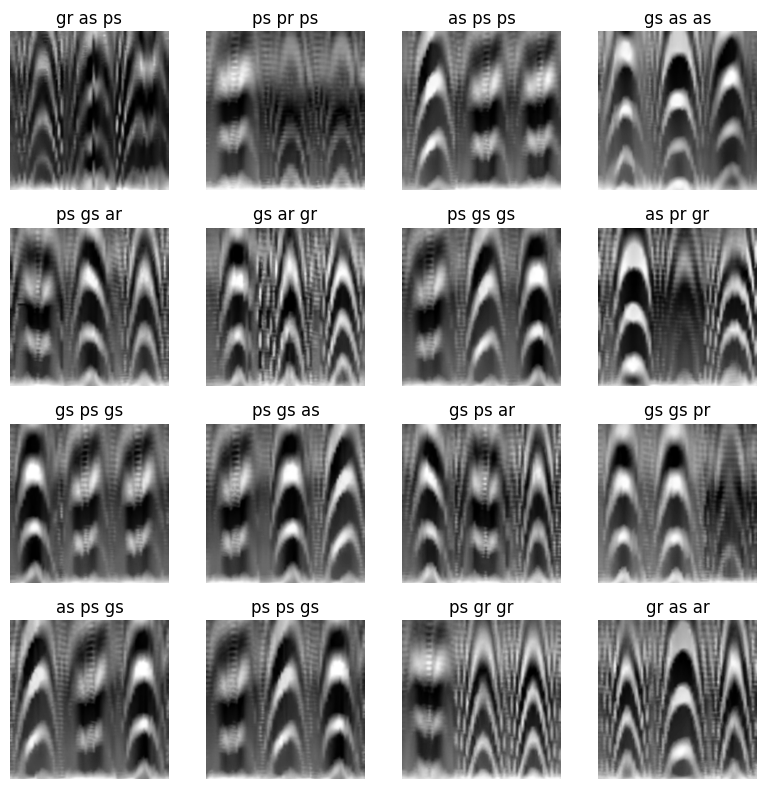

In [11]:
plot_images(images, random_choices)